In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Calculating the time constant of pin 10

(500,)
(500,)


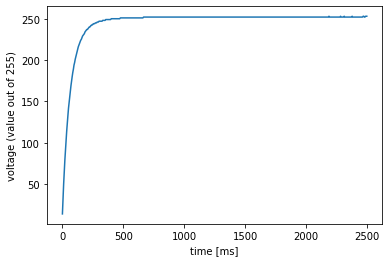

In [23]:
# import data

tb_50 = np.genfromtxt("e7.3_tb50.csv", delimiter=",")

# calibrate time (rather than indices)

time_resolution = 5 #milliseconds -- find out what this is
index = np.linspace(0, np.shape(tb_50)[0], np.shape(tb_50)[0])
time = index*time_resolution

print(np.shape(time))
print(np.shape(tb_50))

# plot
plt.plot(time, tb_50)
plt.xlabel("time [ms]")
plt.ylabel("voltage (value out of 255)")
plt.show()

In [27]:
# define the function to fit to

def charge(t, V_max, tau):
    return V_max*(1-np.exp(-t/tau))

# curve fit

(V_max, tau), pcov = curve_fit(charge, time, tb_50, p0=[255, 100])

# Automate for all three datasets

In [58]:
# Automate

# define the function to fit to

def charge(t, V_max, tau):
    return V_max*(1-np.exp(-t/tau))


# fitting
def time_constant(file, tb):
    """
    Takes the file path and time base (time resolution in microseconds) as arguments. 
    Outputs the time constant based on the fit and its error.
    """
    # import data
    data = np.genfromtxt(file, delimiter=",")

    # calibrate time (rather than indices)

    time_resolution = tb*10**(-6) #time base is the time between analog readings
    index = np.linspace(0, np.shape(data)[0], np.shape(data)[0])
    time = index*time_resolution
    
    # fit
    (V_max, tau), pcov = curve_fit(charge, time, data, p0=[255, 100])
    
    # plot
    plt.plot(time, data, label="data")
    plt.plot(time, charge(time, V_max, tau), label="fit")
    plt.xlabel("time [ms]")
    plt.ylabel("voltage (value out of 255)")
    plt.legend()
    plt.show()
    
    return (tau, np.sqrt(np.diag(pcov))[1])

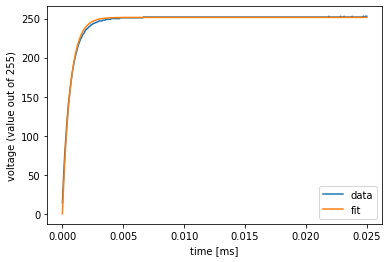

tau for tb 50: (0.0006369404602845282, 2.8894142352417816e-06)


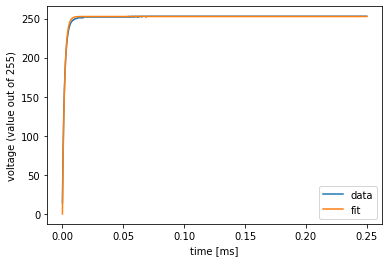

tau for tb 500: (0.0016974494694500315, 9.000456130368516e-06)


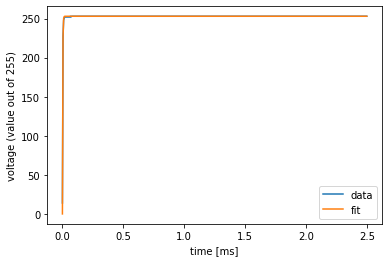

tau for tb 5000: (0.0022203916901185772, 2.3830806332821788e-05)


In [59]:
print("tau for tb 50:", time_constant("e7.3_tb50.csv", 50))
print("tau for tb 500:", time_constant("e7.3_tb500.csv", 500))
print("tau for tb 5000:", time_constant("e7.3_tb5000.csv", 5000))